#### HMA glacier elevatin change analysis by using data by Huggonet et al.(2021) .
#### glacier analysis with elevation change map
!!Note: the glacier outline data used by Huggonet et al.(2021) is RGI6.0


In [1]:
import rasterio
import numpy as np
from glob import glob
import geopandas as gpd
import cartopy.crs as ccrs 
from rasterio.mask import mask
import matplotlib.pyplot as plt
from shapely.geometry import box
from utils.scatter_plot import scatter_plot


In [2]:
### get the paths of the images covering the given geometry
def path_covers_geo(path, geo_shapely):
    filename = path.split('/')[-1]
    lat_min, lon_min = int(filename[1:3]), int(filename[4:7])
    if filename[0] == 'S': lat_min = -lat_min
    if filename[3] == 'W': lon_min = -lon_min
    map_bounds = box(lon_min, lat_min, lon_min+1, lat_min+1)
    geo_bounds = box(*geo_shapely.bounds)
    return map_bounds.intersects(geo_bounds)


In [3]:
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_dhdt_gla_larger1 = 'data/glaciers/gla-elev-change-hugonnet/pergla_time_series/hma_gla_larger1.gpkg'
dif_dhdt_map = 'data/glaciers/gla-elev-change-hugonnet/gla-change_map_2000_2019/dhdt'
paths_dhdt_map = glob(dif_dhdt_map+'/*.tif')
print('Number of elevation change maps:',len(paths_dhdt_map))


Number of elevation change maps: 320


In [4]:
### read in data   
hma_gtng = gpd.read_file(path_hma_gtng)
hma_gtng = gpd.read_file(path_hma_gtng).to_crs(ccrs.PlateCarree().proj4_init)
dhdt_gla_larger1 = gpd.read_file(path_dhdt_gla_larger1)
# hma_gtng.head()
dhdt_gla_larger1.head(2)


,rgiid,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,dmdtda,err_dmdtda,geometry
0,RGI60-13.00017,2000-01-01_2020-01-01,1319000,0.1546,0.1834,203888.0,242537.0,0.000173,0.000207,0.1314,0.1570,"MULTIPOLYGON (((78.357 35.560, 78.357 35.560, ..."
1,RGI60-13.00026,2000-01-01_2020-01-01,1755000,0.1529,0.1807,268411.0,318979.0,0.000228,0.000272,0.1300,0.1556,"MULTIPOLYGON (((78.372 35.552, 78.372 35.552, ..."


In [5]:
# dhdt_gla_ours.head()
dhdt_gla_larger1.head()

,rgiid,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,dmdtda,err_dmdtda,geometry
0,RGI60-13.00017,2000-01-01_2020-01-01,1319000,0.1546,0.1834,203888.0,242537.0,0.000173,0.000207,0.1314,0.1570,"MULTIPOLYGON (((78.357 35.560, 78.357 35.560, ..."
1,RGI60-13.00026,2000-01-01_2020-01-01,1755000,0.1529,0.1807,268411.0,318979.0,0.000228,0.000272,0.1300,0.1556,"MULTIPOLYGON (((78.372 35.552, 78.372 35.552, ..."
2,RGI60-13.00046,2000-01-01_2020-01-01,1305000,0.0130,0.1821,16925.0,237638.0,0.000014,0.000202,0.0110,0.1548,"MULTIPOLYGON (((78.272 35.664, 78.272 35.665, ..."
3,RGI60-13.00052,2000-01-01_2020-01-01,1437000,0.1413,0.1849,203107.0,266141.0,0.000173,0.000227,0.1201,0.1579,"MULTIPOLYGON (((78.104 35.647, 78.103 35.646, ..."
4,RGI60-13.00062,2000-01-01_2020-01-01,2222000,0.0585,0.1726,129921.0,383621.0,0.000110,0.000326,0.0497,0.1468,"MULTIPOLYGON (((78.120 35.644, 78.120 35.644, ..."


Text(0.5, 1.0, 'HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')

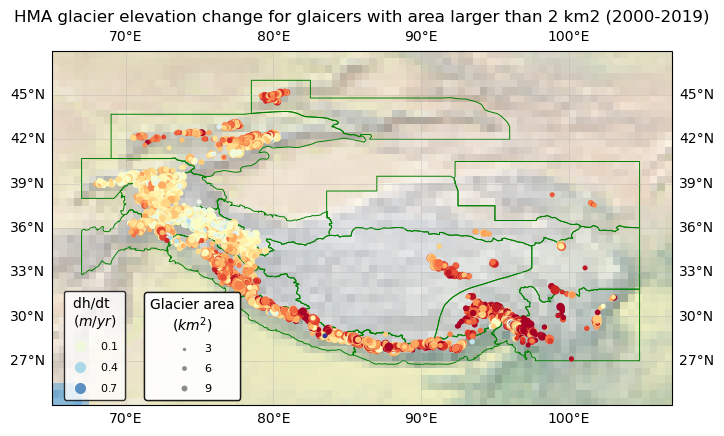

In [6]:
gla_area_clip = dhdt_gla_larger1['area'].values/1_000_000
gla_area_clip[gla_area_clip>10] = 10   
gla_sel_centers = dhdt_gla_larger1.geometry.representative_point()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
scatter_plot(gla_sel_centers.x, gla_sel_centers.y, size=gla_area_clip,  
                          color=dhdt_gla_larger1['dhdt'].values, ax=ax, 
                          labels_size = [3, 6, 9], labels_color = [0.1, 0.4, 0.7], 
                          scale_size = 2, cmap="RdYlBu")
ax.set_title('HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')


### Show glaciers with dh/dt larger than 0.5.

In [7]:
### select glaciers with dh/dt larger than 0.
dhdt_gla_larger1_lower05 = dhdt_gla_larger1[dhdt_gla_larger1['dhdt'] < -0.5]
dhdt_gla_larger1_lower05 = dhdt_gla_larger1_lower05.reset_index()
print(dhdt_gla_larger1.shape)
print(dhdt_gla_larger1_lower05.shape)


(10689, 12)
(2671, 13)


Text(0.5, 1.0, 'HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')

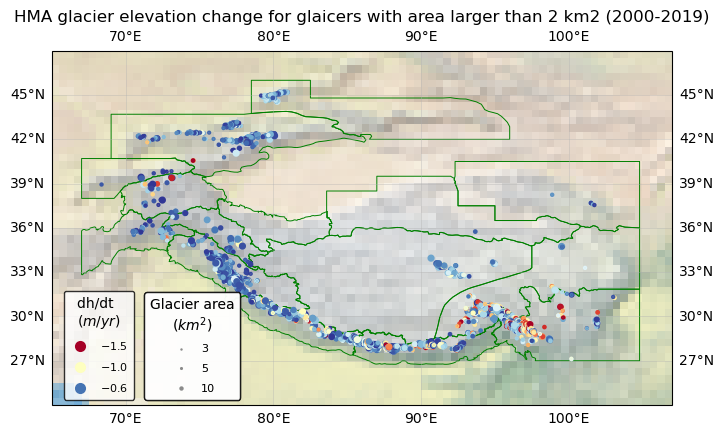

In [8]:
gla_area_clip_ = dhdt_gla_larger1_lower05['area'].values/1_000_000
gla_area_clip_[gla_area_clip_>10] = 10                                 
gla_larger0_higher0_centers = dhdt_gla_larger1_lower05.geometry.representative_point()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
ax = scatter_plot(gla_larger0_higher0_centers.x, gla_larger0_higher0_centers.y, size=gla_area_clip_,  
                          color=dhdt_gla_larger1_lower05['dhdt'].values, ax=ax, 
                          labels_size = [3, 5, 10], labels_color = [-1.5, -1, -0.6], 
                          scale_size = 1, color_range=[-1.5, -0.5], cmap="RdYlBu")
ax.set_title('HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')



### Show glaciers with dh/dt larger than 0.


In [10]:
### select glaciers with dh/dt larger than 0.
dhdt_gla_larger1_higher0 = dhdt_gla_larger1[dhdt_gla_larger1['dhdt'] > 0]
dhdt_gla_larger1_higher0 = dhdt_gla_larger1_higher0.reset_index()
print(dhdt_gla_larger1.shape)
print(dhdt_gla_larger1_higher0.shape)


(10689, 12)
(1943, 13)


Text(0.5, 1.0, 'HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')

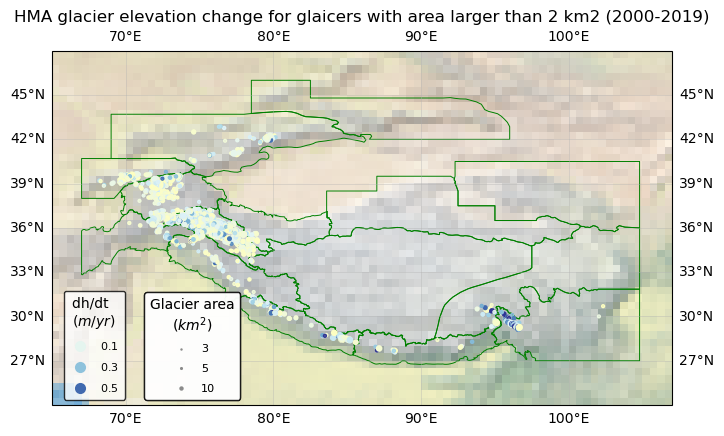

In [11]:
gla_area_clip_ = dhdt_gla_larger1_higher0['area'].values/1_000_000
gla_area_clip_[gla_area_clip_>10] = 10    
gla_larger1_higher0_centers = dhdt_gla_larger1_higher0.geometry.representative_point()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
ax = scatter_plot(gla_larger1_higher0_centers.x, gla_larger1_higher0_centers.y, size=gla_area_clip_,  
                          color=dhdt_gla_larger1_higher0['dhdt'].values, ax=ax, 
                          labels_size = [3, 5, 10], labels_color = [0.1, 0.3, 0.5], 
                          scale_size = 1, color_range=[-0.6,0.6], cmap="RdYlBu")
ax.set_title('HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')


### Show glaciers with dh/dt larger than 0.5.

In [12]:
### select glaciers with dh/dt larger than 0.5.
dhdt_gla_larger1_higher05 = dhdt_gla_larger1[dhdt_gla_larger1['dhdt'] > 0.5]
dhdt_gla_larger1_higher05 = dhdt_gla_larger1_higher05.reset_index()
print(dhdt_gla_larger1.shape)
print(dhdt_gla_larger1_higher05.shape)


(10689, 12)
(44, 13)


Text(0.5, 1.0, 'HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')

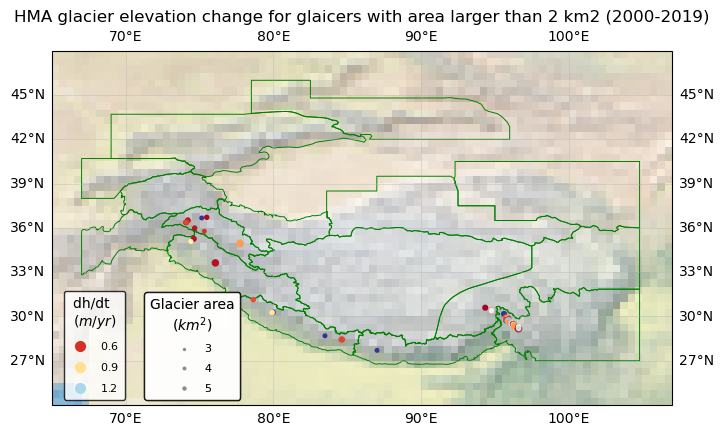

In [13]:
gla_area_clip_ = dhdt_gla_larger1_higher05['area'].values/1_000_000
gla_area_clip_[gla_area_clip_>10] = 10   
gla_larger0_higher05_centers = dhdt_gla_larger1_higher05.geometry.representative_point()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
ax = scatter_plot(gla_larger0_higher05_centers.x, gla_larger0_higher05_centers.y, size=gla_area_clip_,  
                          color=dhdt_gla_larger1_higher05['dhdt'].values, ax=ax, 
                          labels_size = [3, 4, 5], labels_color = [0.6, 0.9, 1.2], 
                          scale_size = 2, color_range=[0.5, 1.5], cmap="RdYlBu")
ax.set_title('HMA glacier elevation change for glaicers with area larger than 2 km2 (2000-2019)')


#### Check the elevation change map

In [14]:
id = 42
geo = dhdt_gla_larger1_higher05.loc[id, 'geometry']
dhdt = dhdt_gla_larger1_higher05.loc[id, 'dhdt']
rgi_id = dhdt_gla_larger1_higher05.loc[id, 'rgiid']
area = dhdt_gla_larger1_higher05.loc[id, 'area']/1_000_000
print(rgi_id, dhdt, area)


RGI60-15.12550 0.9608 2.171


<Axes: >

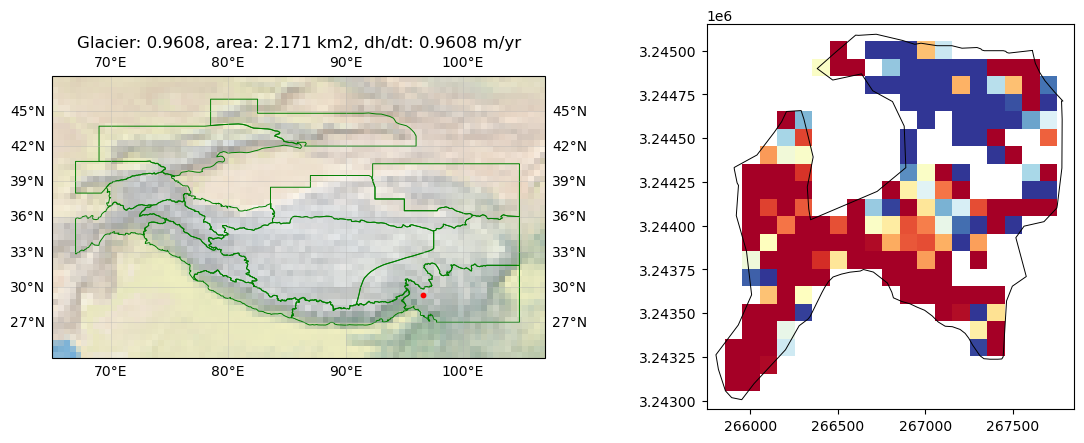

In [15]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
ax.scatter(x=geo.centroid.x, y=geo.centroid.y, s=10, c='red', zorder=2)
ax.set_title(f'Glacier: {dhdt}, area: {area} km2, dh/dt: {dhdt} m/yr')

cover_imgs = [path for path in paths_dhdt_map if path_covers_geo(path, geo_shapely=geo)]
## plot the elevation change map
if len(cover_imgs) == 1:
  with rasterio.open(cover_imgs[0]) as src:
    geo_utm = gpd.GeoDataFrame(geometry=[geo], crs=dhdt_gla_larger1_higher0.crs)\
                                          .to_crs(epsg=src.crs.to_epsg())
    out_image, out_transform = mask(src, [geo_utm.geometry[0]], crop=True)
    out_image[out_image==src.nodata] = np.nan
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(out_image[0], cmap='RdYlBu', vmin=-0.6, vmax=0.6, 
                    extent=[out_transform[2], out_transform[2]+out_transform[0]*out_image.shape[2], 
                            out_transform[5]+out_transform[4]*out_image.shape[1], out_transform[5]]) 
geo_utm.plot(ax=ax2, facecolor='None', edgecolor='black', lw=0.7)
